<a href="https://colab.research.google.com/github/PhanDinhPhong/BTVN2/blob/main/btvn2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.layers import Dense, Activation, Dropout,Flatten
from sklearn.utils import shuffle
import cv2
import math
import csv
import pickle
import sklearn
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical 
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

l1 = 50
l2 = 40
z = []
for t1 in range(0, 180, 2):
  for t2 in range(0, 180, 2):
    x = l1*math.cos(math.radians(t1)) + l2*math.cos(math.radians(t1+t2))
    y = l1*math.sin(math.radians(t1)) + l2*math.sin(math.radians(t1+t2))
    z.append(np.array((t1,t2,x,y)))
    label = ['theta1', 'theta2', 'x', 'y']
with open('robot2bac.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(label)
    writer.writerows(z)

data = pd.read_csv('robot2bac.csv')
data.shape
numpy_dataset = data.values
y=numpy_dataset[:,:2]
x=numpy_dataset[:,2:]
x_train,x_test,y_train,y_test= train_test_split(x, y, test_size = 0.2)

model = Sequential() 
model.add(Dense(256, activation='relu', input_shape = (2,))) 
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               768       
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 2)                 66        
                                                                 
Total params: 85,154
Trainable params: 85,154
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss = 'mse', optimizer =Adam(), metrics  = ['accuracy'])
history = model.fit(x_train, y_train, batch_size= 64, epochs = 30, validation_split = 0.2)

Epoch 1/30
81/81 [==============================] - 6s 10ms/step - loss: 4625.8828 - accuracy: 0.6238 - val_loss: 3923.6450 - val_accuracy: 0.6682
Epoch 2/30
81/81 [==============================] - 0s 5ms/step - loss: 3710.5667 - accuracy: 0.6532 - val_loss: 3776.6135 - val_accuracy: 0.6690
Epoch 3/30
81/81 [==============================] - 0s 4ms/step - loss: 3522.4861 - accuracy: 0.6605 - val_loss: 3443.0347 - val_accuracy: 0.6798
Epoch 4/30
81/81 [==============================] - 0s 5ms/step - loss: 2148.2224 - accuracy: 0.7514 - val_loss: 435.7587 - val_accuracy: 0.8673
Epoch 5/30
81/81 [==============================] - 0s 6ms/step - loss: 274.8098 - accuracy: 0.8918 - val_loss: 182.1648 - val_accuracy: 0.8850
Epoch 6/30
81/81 [==============================] - 0s 5ms/step - loss: 124.5711 - accuracy: 0.9211 - val_loss: 75.7539 - val_accuracy: 0.9244
Epoch 7/30
81/81 [==============================] - 0s 5ms/step - loss: 77.7379 - accuracy: 0.9392 - val_loss: 57.4765 - val_accu

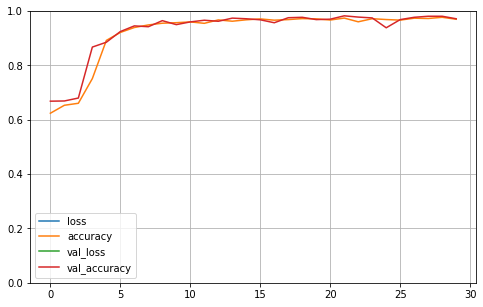

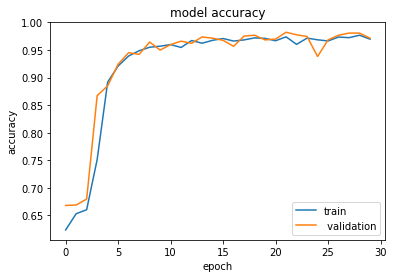

In [ ]:
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', ' validation'])
plt.show()

In [ ]:
Px_testtrain = 60
Py_testtrain = 30
print(Px_testtrain,Py_testtrain)
ktra = model.predict([[Px_testtrain,Py_testtrain]])
t1 = ktra[0][0]
t2 = ktra[0][1]
X = l1*math.cos(math.radians(t1))+l2*math.cos(math.radians(t1+t2))
Y = l1*math.sin(math.radians(t1))+l2*math.sin(math.radians(t1+t2))
print('x = ',X,'\n y = ',Y)
print('Góc t1 = ', t1,'\n Góc t2 = ', t2)

60 30
x =  62.59322150927673 
 y =  36.587887172276794
Góc t1 =  -1.572142 
 Góc t2 =  73.19315
